# Step 1: Import Libraries 

In [1199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load and Explore the Dataset

    1. Import the CSV file containing the New Year sales data.

In [1200]:
df = pd.read_csv('New_Year_Sales_Data.csv', encoding='latin1')
df.head(4)      # Display the first 4 rows of the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN


# Step 3: Data Cleaning

In [1201]:
df.info()  # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


    1.  Check for null values.

In [1202]:
df.isnull().sum(  )    # Check for missing values in each column

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

    2.  Drop unnecessary columns that do not contribute to analysis.

In [1203]:
df.drop (['Status','unnamed1'], axis=1, inplace=True)  # Drop unnecessary columns

In [1204]:
df.head(2) # Display the first 2 rows after cleaning

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0


    3.  Drop rows with null values in other important columns. 

In [1205]:
df.dropna(subset=['Amount'], inplace=True)  # Drop rows with missing 'Amount' values

In [1206]:
df.isnull().sum() # Check for missing values again after cleaning

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

    4.  Convert the Amount column to an integer type for consistency in calculations. 

In [1207]:
df['Amount'] = df['Amount'].astype(int)  # Convert 'Amount' column to integer type

# Step 4: Data Overview and Summary:

1. Get summary statistics. 

In [1208]:
df.describe()  # Display summary statistics of the DataFrame

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


2. Check for unique values in columns to understand the dataset better

In [1209]:
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

# Exploratory Data Analysis (EDA) 

# 1. Gender Analysis 

• Question: Which gender has a higher purchasing power? 

In [ ]:
df.groupby('Gender')['Amount'].sum() 

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

    * Create a count plot for gender. 

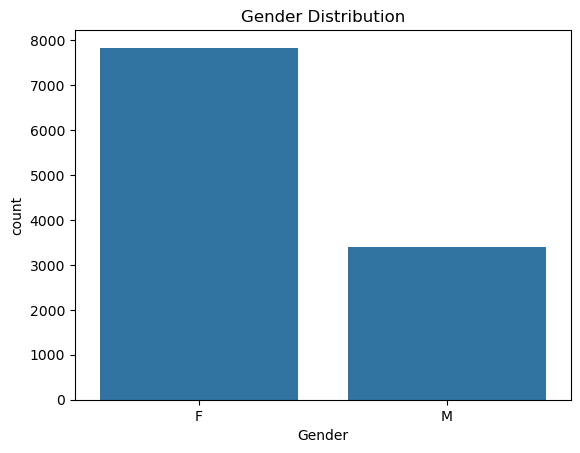

In [1211]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

    * Plot a bar chart to show the total purchase amount by gender. 

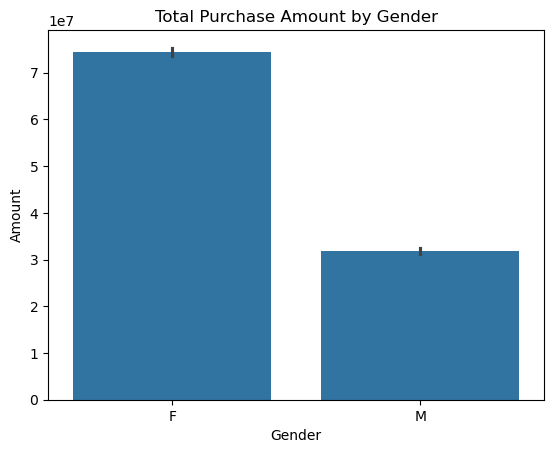

In [1212]:
sns.barplot(x='Gender', y='Amount', data=df, estimator=sum)
plt.title('Total Purchase Amount by Gender')
plt.show()

# 2. Age Group Analysis 

* Question: Which age group has the most purchases, and is there a trend in purchasing 
power by age?

In [1213]:
df.groupby('Age Group')['Amount'].sum()

Age Group
0-17      2699653
18-25    17240732
26-35    42613442
36-45    22144994
46-50     9207844
51-55     8261477
55+       4080987
Name: Amount, dtype: int32

    o Plot a count plot of age groups with hue as gender. 

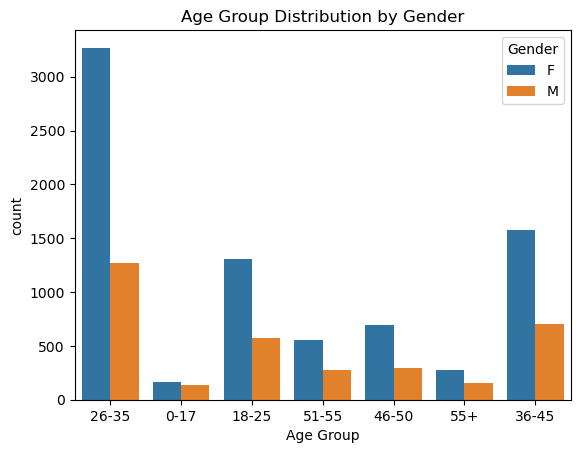

In [1214]:
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Age Group Distribution by Gender')
plt.show()

    Plot a bar chart showing total purchase amount by age group.

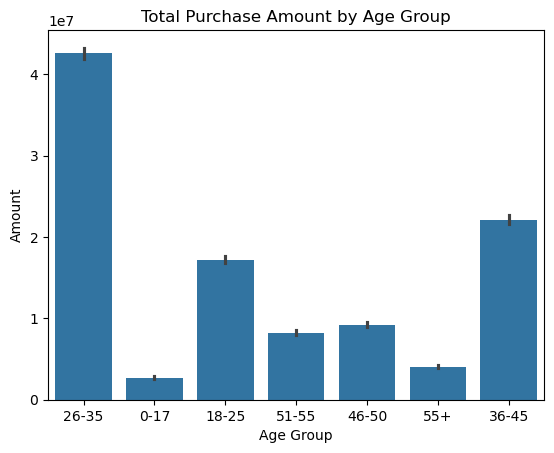

In [1215]:
sns.barplot(x='Age Group', y='Amount', data=df, estimator=sum)
plt.title('Total Purchase Amount by Age Group')
plt.show()

# 3. State Analysis 

Question: Which states generate the highest number of orders and revenue?

    * Plot bar charts for the number of orders and total amount by state, focusing on 
    the top 10 states. 

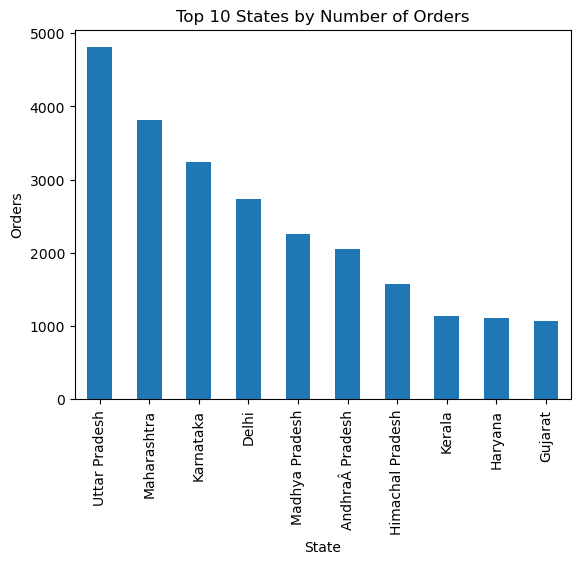

In [1216]:
top_states_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
top_states_orders.plot(kind='bar')
plt.title('Top 10 States by Number of Orders')
plt.ylabel('Orders')
plt.show()

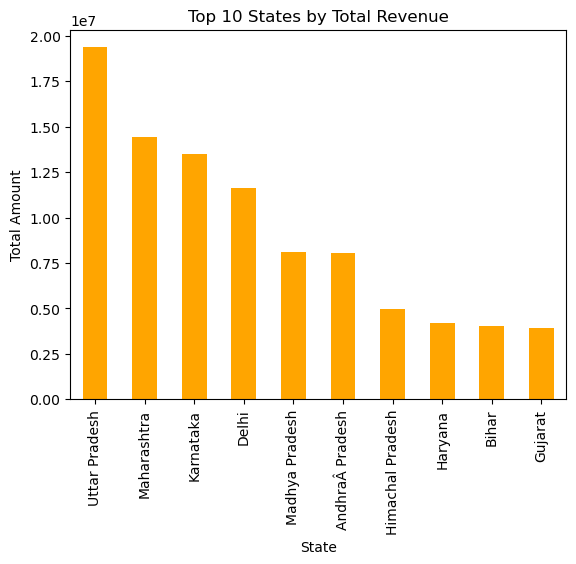

In [1217]:
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states_amount.plot(kind='bar', color='orange')
plt.title('Top 10 States by Total Revenue')
plt.ylabel('Total Amount')
plt.show()

# Marital Status Analysis

* Question: How does marital status affect purchasing behavior? 

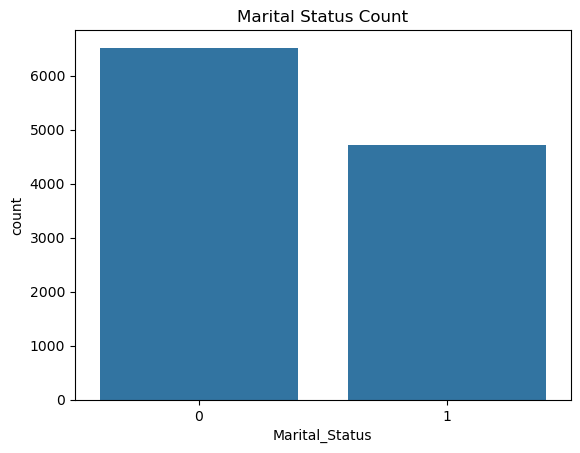

In [1218]:
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Count')
plt.show()

 * Plot a count plot for marital status and a bar chart showing total amount spent 
by marital status, with gender as a hue. 

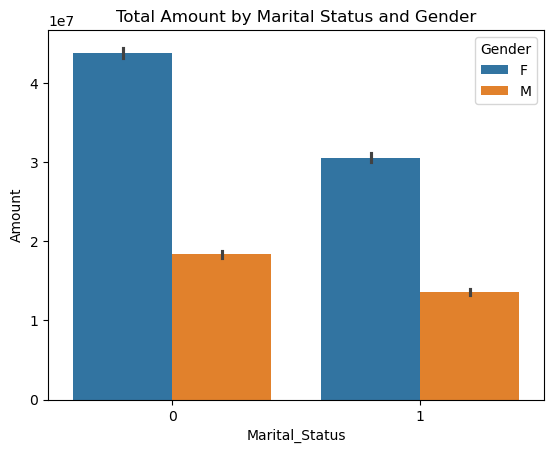

In [1219]:

sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=df, estimator=sum)
plt.title('Total Amount by Marital Status and Gender')
plt.show()

## Occupation Analysis

* Question: Which occupations contribute most to sales? 

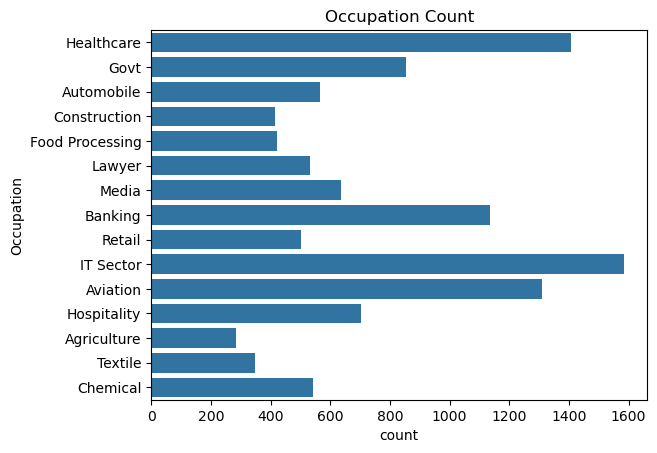

In [1220]:
sns.countplot(y='Occupation', data=df)
plt.title('Occupation Count')
plt.show()

* Create a count plot for occupation and a bar chart for total sales by occupation. 

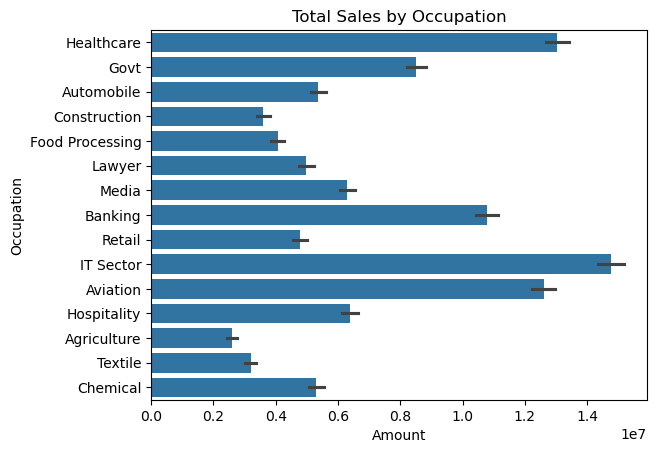

In [1221]:
sns.barplot(y='Occupation', x='Amount', data=df, estimator=sum)
plt.title('Total Sales by Occupation')
plt.show()

 # 6. Product Category Analysis 

* *Question:* What product categories are the most popular, and which ones generate the 
most revenue?

    * Create a count plot for product categories. 

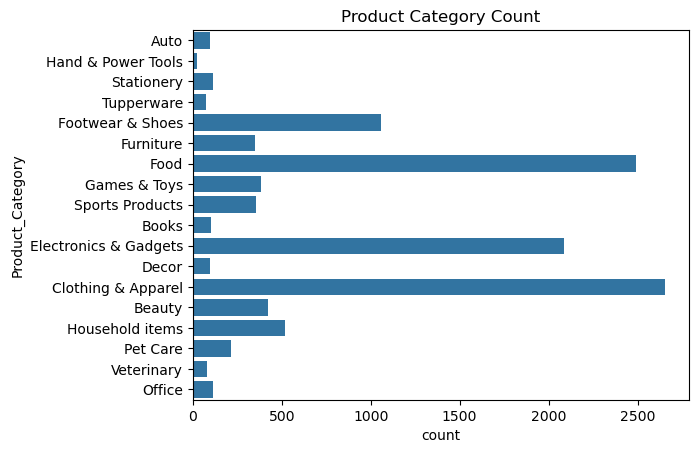

In [1222]:
sns.countplot(y='Product_Category', data=df)
plt.title('Product Category Count')
plt.show()

    * Create a bar chart to show the total amount by product category for the top 
categories. 

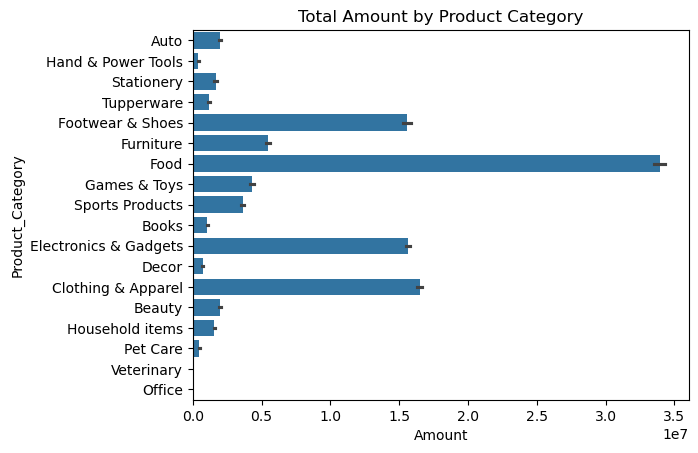

In [1223]:

sns.barplot(y='Product_Category', x='Amount', data=df, estimator=sum)
plt.title('Total Amount by Product Category')
plt.show()

 # Additional Questions:

    1. Which age group contributes the most to each product category, and does this vary by 
    gender? 

In [1224]:
df.groupby('Age Group')['Amount'].sum()

Age Group
0-17      2699653
18-25    17240732
26-35    42613442
36-45    22144994
46-50     9207844
51-55     8261477
55+       4080987
Name: Amount, dtype: int32

    2. How does the amount spent vary by marital status across different age groups? 

In [1225]:
df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(1)


State
Uttar Pradesh    4807
Name: Orders, dtype: int64

    3. Which states show the highest growth in orders and revenue, and are there seasonal 
    spikes in sales? 

In [1226]:
df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(1)

State
Uttar Pradesh    19374968
Name: Amount, dtype: int32

    4. Are there specific occupations that prefer particular product categories more than 
    others? 

In [1227]:
df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(1)


Occupation
IT Sector    14755079
Name: Amount, dtype: int32

In [1228]:
df['Product_Category'].value_counts().head(1)

Product_Category
Clothing & Apparel    2655
Name: count, dtype: int64

    5.What is the correlation between age and spending amount, and does this differ by 
    gender? 

In [1229]:
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(1)

Product_Category
Food    33933883
Name: Amount, dtype: int32

# Conclusion Summary
High-purchasing customers are likely married males aged 26–35 from Maharashtra or UP, working in IT or Healthcare, buying Clothing and Electronics.